# The Sparks Foundation

# GRIPNOV20 DATA SCIENCE AND BUSINESS ANALYTICS Task

**NAME- SUMIT RAGHUVANSHI**

# EDA-Sample Superstore Data in Data Science

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [2]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#shape of the data
data.shape

(9994, 13)

In [6]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
#check whether any null values in dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#total number of null values
data.isnull().sum().sum()

0

In [9]:
#check the numerical value in the sample superstore dataset with describe function
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
#check the types of dataset
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [11]:
#All the columns in the datset
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
#for display all the columns
pd.set_option('display.max_columns', None)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
#value counts for the profit columns
data['Profit'].value_counts()

 0.0000      65
 6.2208      43
 9.3312      38
 5.4432      32
 3.6288      32
             ..
-3.5622       1
-7.4800       1
 626.1850     1
-12.8392      1
 6.1704       1
Name: Profit, Length: 7287, dtype: int64

In [14]:
#value counts for the states column
data.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [15]:
#Function return Series with number of distinct observations over requested axis
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [16]:
#check the dupplicates in the dataset
data.duplicated().sum()

17

In [17]:
#drop the duplicates
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [18]:
#deleting the column of postal code because there is no use of postal code data in this sample
col=['Postal Code']
data=data.drop(columns=col,axis=1)

In [19]:
data.shape

(9994, 12)

In [20]:
#correlation of dataset
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [21]:
#Aggregate Function in State column with respect to their Profit
data1=data.groupby("State").Profit.agg(["sum", "mean", "count", "median", "min", "max", "var", "std"])
data1

,sum,mean,count,median,min,max,var,std
State,,,,,,,,
Alabama,5786.8253,94.865989,61,16.87500,0.0000,1459.2000,44479.601429,210.901876
Arizona,-3427.9246,-15.303235,224,2.53365,-814.4832,211.4955,11939.117124,109.266267
Arkansas,4008.6871,66.811452,60,18.34080,1.4190,843.1706,15190.532873,123.249880
California,76381.3871,38.171608,2001,13.30560,-325.5720,1906.4850,9543.647400,97.691593
Colorado,-6527.8579,-35.867351,182,3.12480,-3399.9800,247.9960,76410.240842,276.424024
Connecticut,3511.4918,42.823071,82,12.18310,-15.5826,294.6710,4374.245726,66.138081
Delaware,9977.3748,103.930988,96,19.19700,-48.7839,5039.9856,269312.749126,518.953513
District of Columbia,1059.5893,105.958930,10,14.52720,4.4344,648.5624,45565.749398,213.461353
Florida,-3399.3017,-8.875461,383,2.93400,-1811.0784,327.5922,15957.794770,126.324165


# Now Visualization for all the dataset of sample Superstore

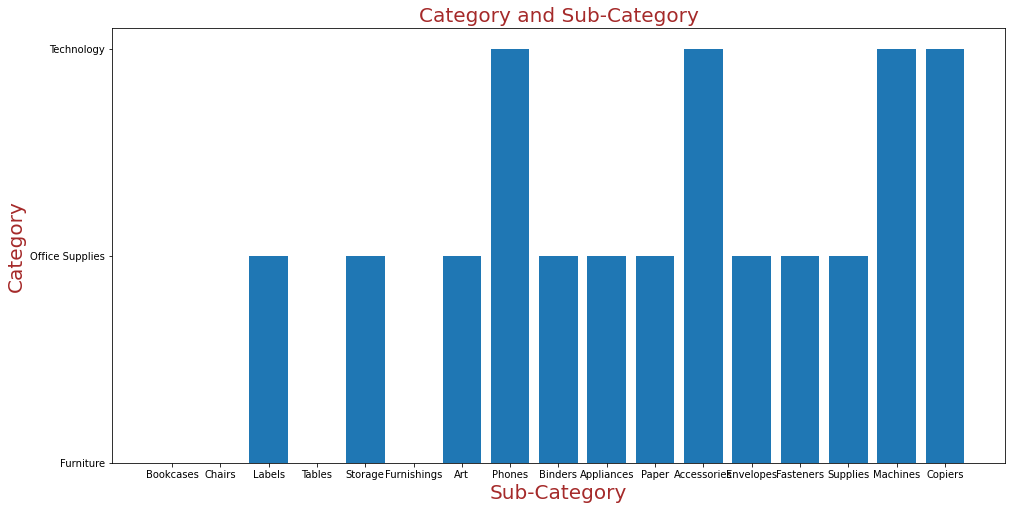

In [59]:
#Bar chart for the category and sub-category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=data)
plt.title("Category and Sub-Category",  fontdict={'fontsize':20, 'fontweight':10, 'color':'Brown'})
plt.xlabel("Sub-Category", fontdict={'fontsize':20, 'fontweight':10, 'color':'Brown'})
plt.ylabel("Category", fontdict={'fontsize':20, 'fontweight':10, 'color':'Brown'})
plt.show()

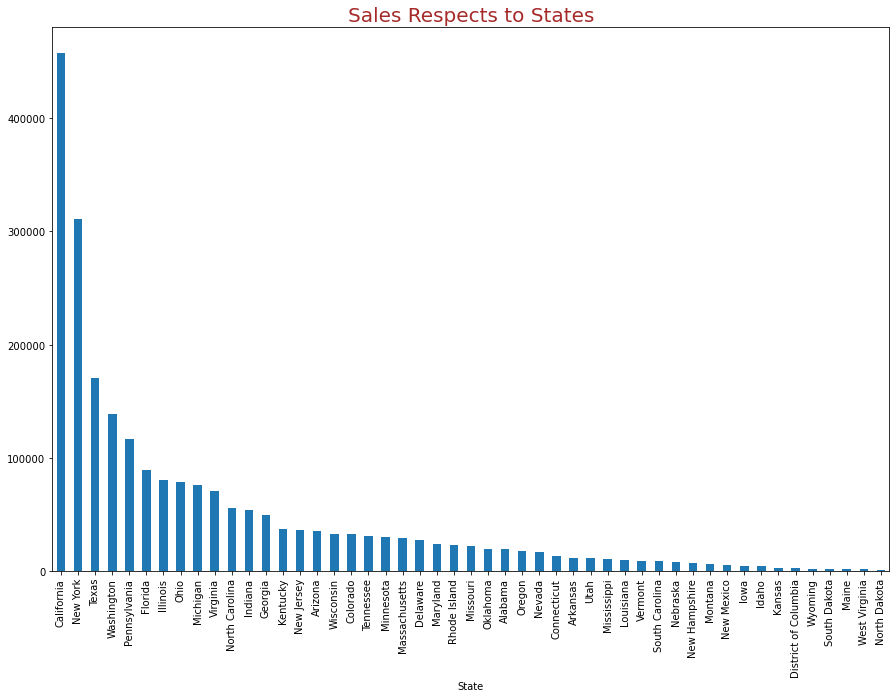

In [23]:
#Plot a bar chart for state which helps to read State with sales the data
State_Sales=data.groupby(['State'])['Sales'].sum()
State_Sales.sort_values(ascending=False, inplace=True)
fig, ax=plt.subplots(figsize=(15,10))
plt.title("Sales Respects to States", fontdict={'fontsize':20, 'fontweight':10, 'color':'Brown'})
State_Sales.plot.bar()
plt.show()

**Its is clearly shown that California has the highest number of Sales**

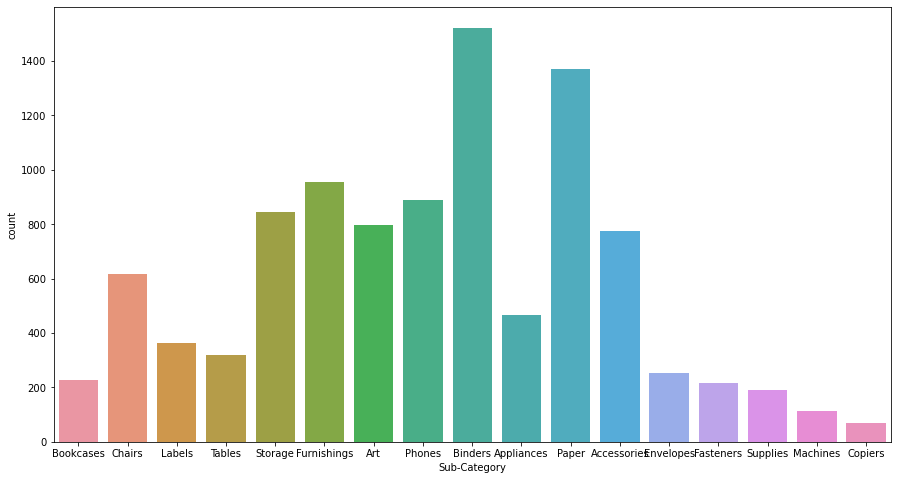

In [24]:
#barplot for Sub-category
plt.figure(figsize=[15,8])
sns.countplot(x=data["Sub-Category"], )
plt.show()

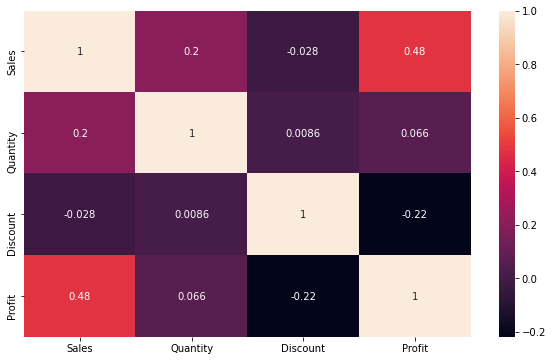

In [25]:
#heatmap for higher and larger value
plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), annot=True)
plt.show()

**Discount shows the Least number of correlation**

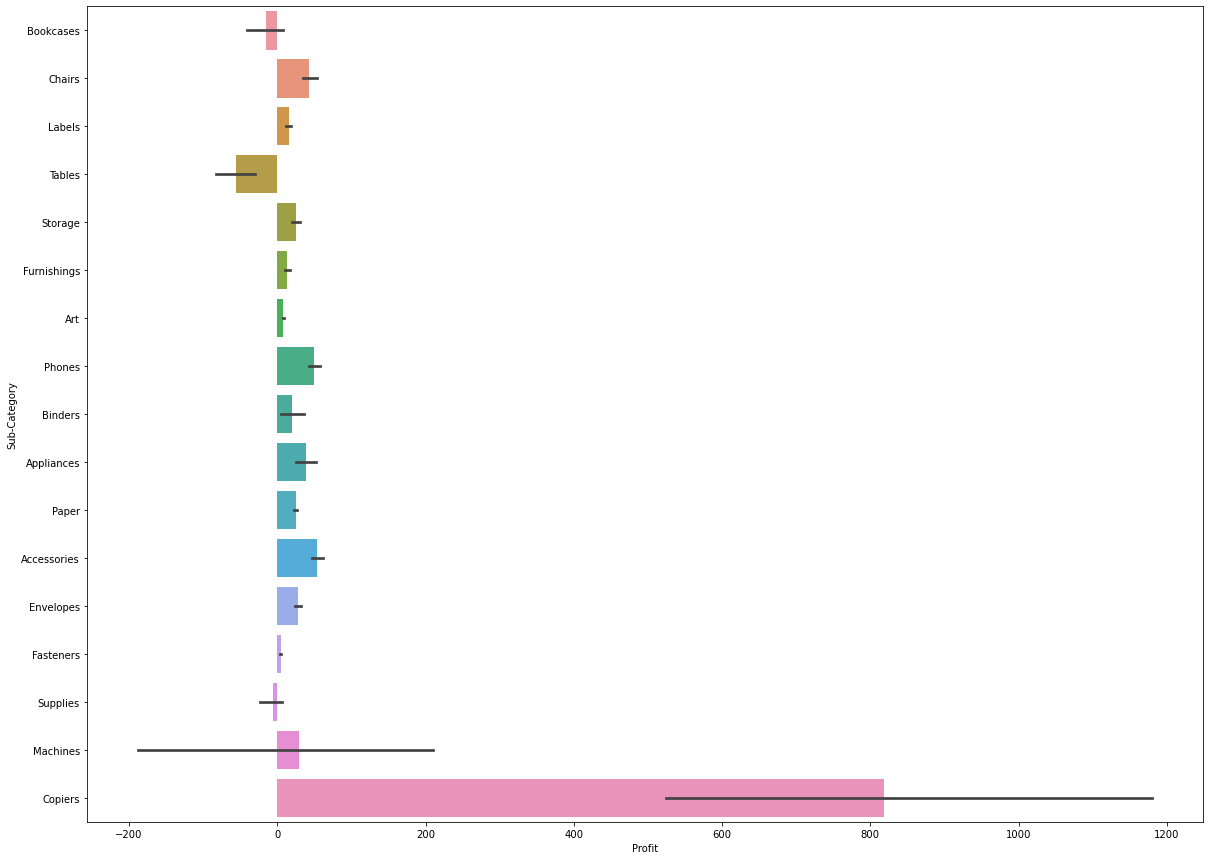

In [26]:
plt.figure(figsize=(20,15))
sns.barplot(x=data["Profit"], y=data["Sub-Category"])
plt.show()

**It is cleraly shown that copiers in Sub-Category has Large number of Profit**

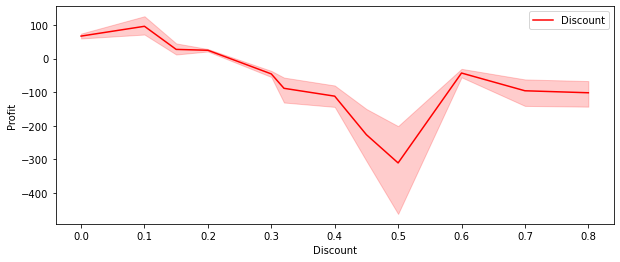

In [27]:
#line charts
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = data, color = 'r', label= 'Discount')
plt.show()

**This Line Chart indicates the profit with the respective of Discount**

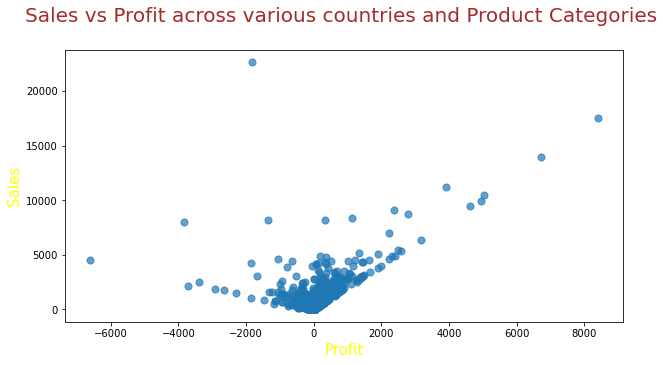

In [28]:
#sactter plot for sales with their profit values
plt.figure(figsize=[10,5])
plt.scatter(data["Profit"], data["Sales"], alpha=0.7, s=50)

plt.title("Sales vs Profit across various countries and Product Categories \n", fontdict={'fontsize':20, 'fontweight':5, 'color':'Brown'})
plt.xlabel("Profit", fontdict={'fontsize':15, 'fontweight':5, 'color':'Yellow'})
plt.ylabel("Sales", fontdict={'fontsize':15, 'fontweight':5, 'color':'Yellow'})
plt.show()


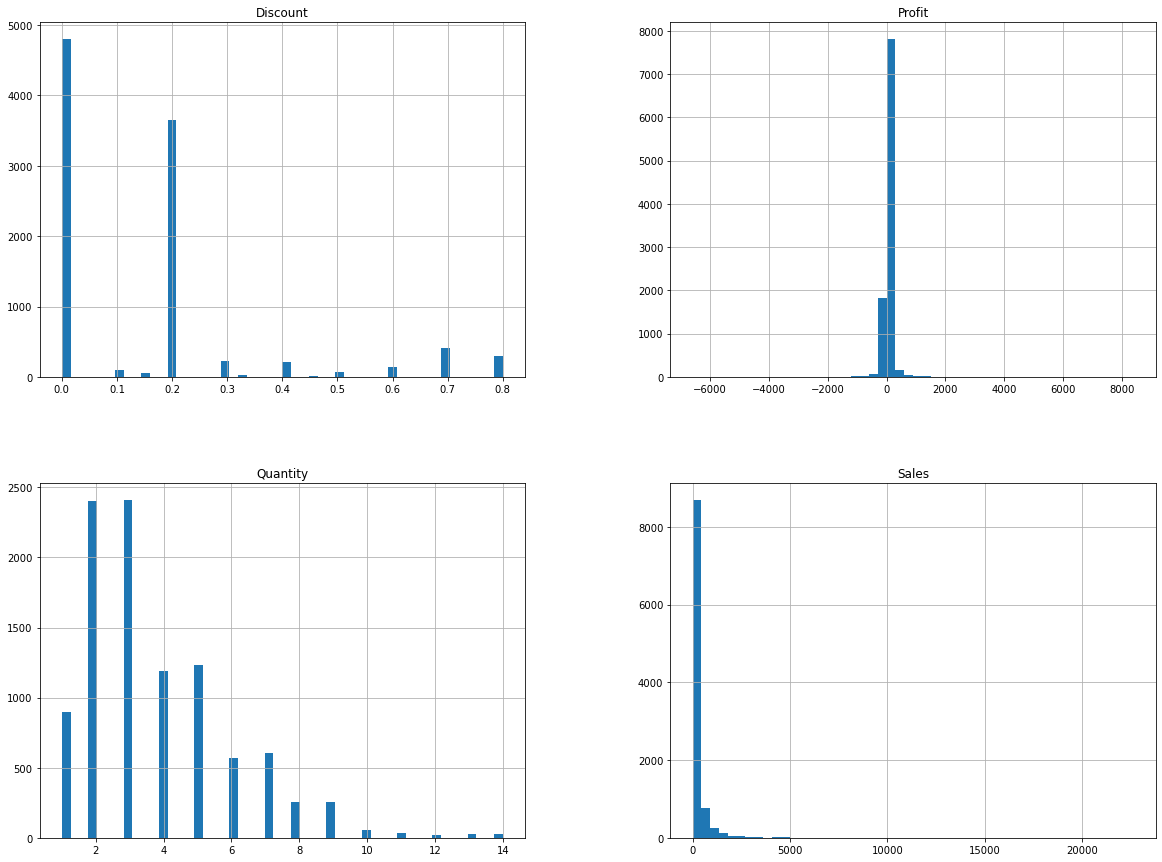

In [29]:
#plot histogram for numerical values

data.hist(bins=50 ,figsize=(20,15))
plt.show()


**All the Histograms shows the values more specifically**

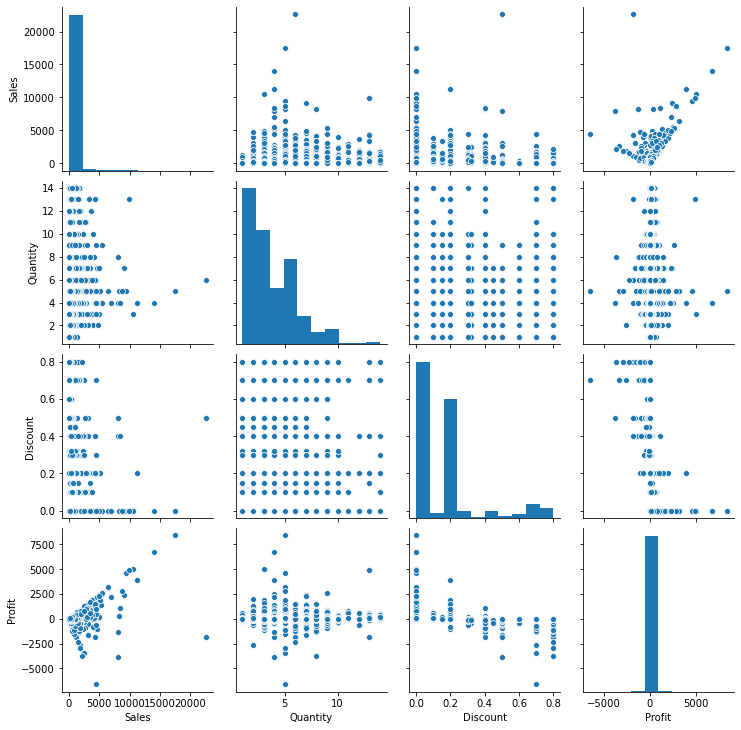

In [30]:
#pairplot of the whole dataset
sns.pairplot(data)
plt.show()

**This Pairplot indicates all the numerical values of sample superstore dataset.**

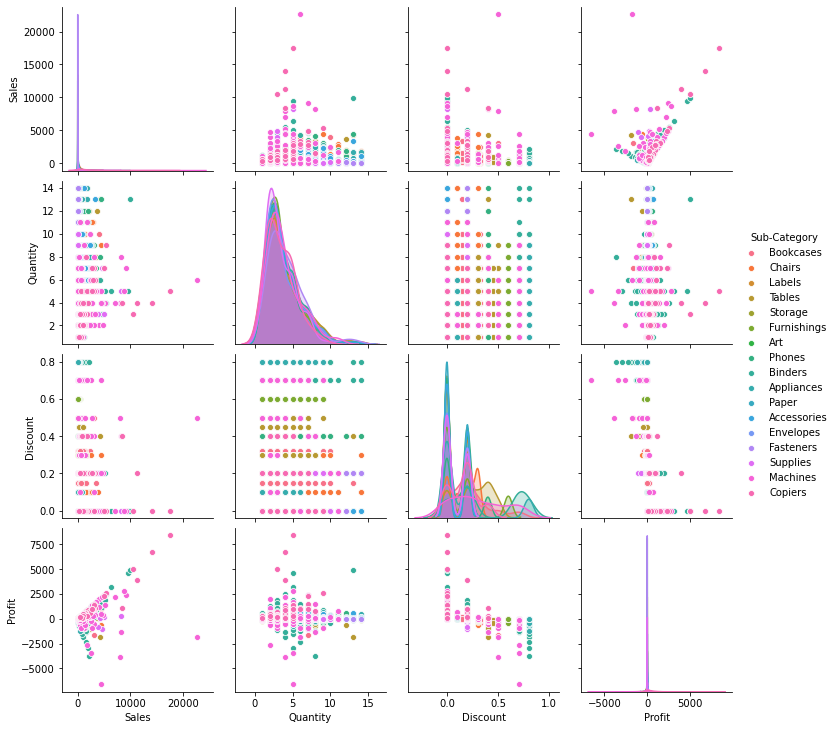

In [31]:
#PairPlot of data with Sub-Category
figsize=(16,11)
sns.pairplot(data,hue='Sub-Category')
plt.show()

**Sub-Category of the furniture indicates that their Quantity, Sales, Discount and Profit are based on the margin.**

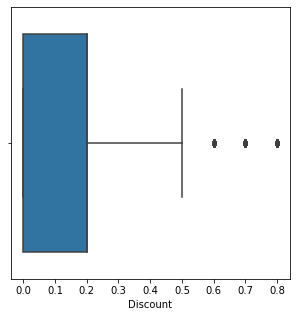

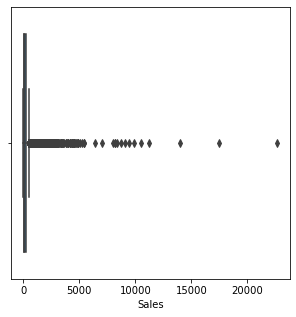

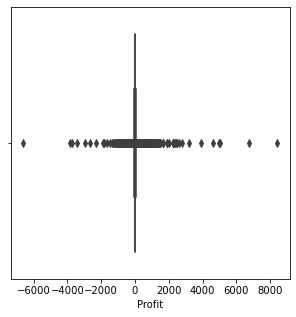

In [32]:
#Boxplots
fig, axes = plt.subplots(figsize = (5,5))

sns.boxplot(data['Discount'])

fig, axes = plt.subplots(figsize = (5,5))

sns.boxplot(data['Sales'])

fig, axes = plt.subplots(figsize = (5 ,5))

sns.boxplot(data['Profit'])

plt.show()

In [33]:
#Quantiles in Numerical Values
Q1 = data.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Q3 = data.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

IQR=Q3 - Q1

IQR

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64

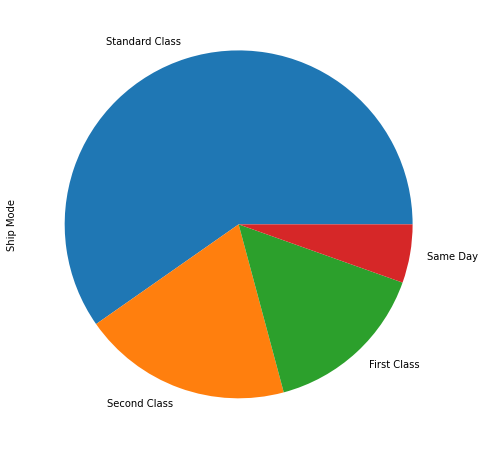

In [34]:
#Plotting a pie chart for ship mode
plt.figure(figsize=[10,8])
data['Ship Mode'].value_counts().plot.pie()
plt.show()

**So the most order being delevired is cleraly Standard Class which is shown in pie-chart**

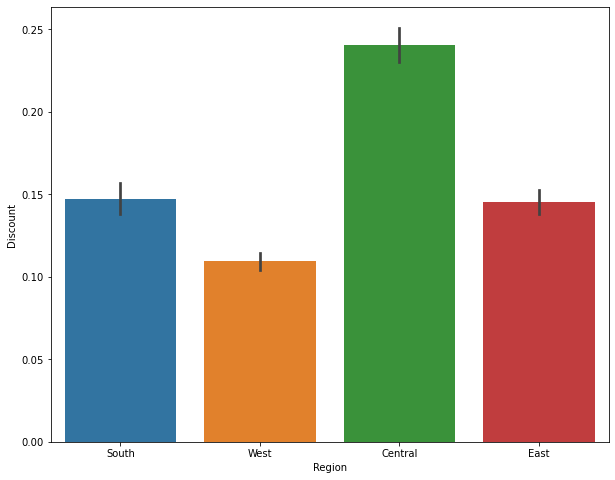

In [50]:
# Plot a bar chart comparing the average Discount across all the Regions and report back the Region getting the highest average discount
plt.figure(figsize=[10,8])
sns.barplot(x = 'Region', y = 'Discount', data = data)
plt.show()

**S it is clearly shown that central is the highest region of Discount**

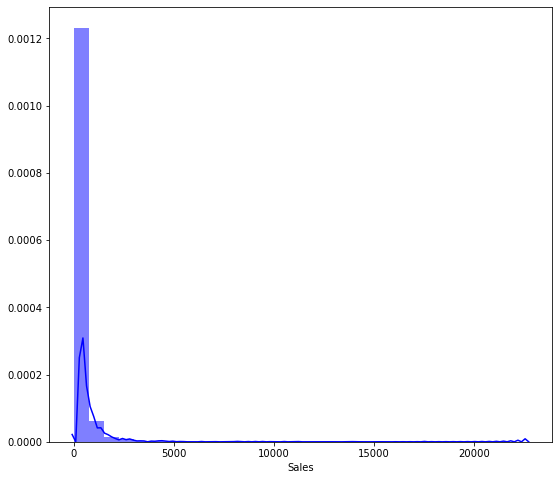

In [58]:
#distribution plot
data['Sales'].describe()
plt.figure(figsize = (9 , 8))
sns.distplot(data['Sales'], color = 'b', bins =30, hist_kws = {'alpha': 0.5})
plt.show()

**Distribution Plot for sales shows range and mean with the help of its Curve**,
**Mean=229.858001**

In [36]:
X = data[["Sales","Profit"]]

In [37]:
X

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164
...,...,...
9989,25.2480,4.1028
9990,91.9600,15.6332
9991,258.5760,19.3932
9992,29.6000,13.3200


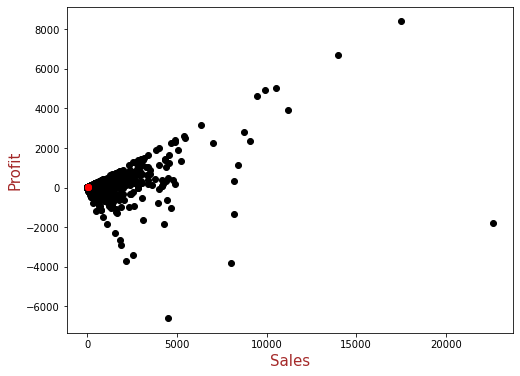

In [55]:
#Sales and Profit with their Centrioids
K=3

# Select random observation as centroids
plt.figure(figsize=[8,6])
Centroids = (X.sample(n=K))
plt.scatter(X["Sales"],X["Profit"],c='black')
plt.scatter(Centroids["Sales"],Centroids["Profit"],c='red')
plt.xlabel("Sales", fontdict={'fontsize':15, 'fontweight':5, 'color':'Brown'})
plt.ylabel("Profit", fontdict={'fontsize':15, 'fontweight':5, 'color':'Brown'})
plt.show()

# Now Basic Visualization in Plotly

In [39]:
res=data.groupby(["Sales"])["Profit"].mean()

In [40]:
res.sort_values(ascending=False, inplace=True)

In [41]:
res

Sales
17499.950    8399.9760
13999.960    6719.9808
10499.970    5039.9856
9892.740     4946.3700
9449.950     4630.4755
               ...    
1889.990    -2929.4845
2549.985    -3399.9800
2177.584    -3701.8928
7999.980    -3839.9904
4499.985    -6599.9780
Name: Profit, Length: 5825, dtype: float64

In [61]:
#Scatter Plot
fig = go.Figure(data=go.Scatter(y=data.Profit))
fig.show()

In [70]:
#box plot in Plotly
fig = go.Figure(data=go.Box(x=data.Sales,y=data.Profit))
fig.show()

fig = go.Figure(data=go.Box(y=data.Profit))
fig.show()

In [48]:
fig = go.Figure(data=go.Box(x=data.State,y=data.Profit))
fig.show()

# Each State shows their Profit in Plotly

**Observations:**

**State-CALIFORNIA has the more Profit than any other states.**

**Standard Class in Ship Mode is most Peferrable than any other modes.**

**Copiers in Sub_category are on Huge Profit and Bookcase in Sub-category are on loss.**

**Central Region People has the more Discount than any other regions.**

**Technology have the high number of sales in Phones, Accessories, Machine and Copiers while Office Supplies has the wide number of Sales.**

# Thank You